<a href="https://colab.research.google.com/github/Durgasiv/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.00,17918.00,17918.00,17918.00,17918.00,17917.00,17917.00,17917.00,17917.00,17917.00,...,17917.00,17917.00,17917.00,17917.00,17917.00,17917.00,17917.00,17917.00,17917.00,17917.00
mean,13905.28,-0.24,0.26,0.78,0.29,-0.15,0.10,-0.15,0.01,0.73,...,-0.05,-0.15,-0.04,0.01,0.12,0.04,0.01,0.01,67.50,0.00
std,9867.92,1.89,1.51,1.77,1.48,1.42,1.33,1.34,1.32,1.27,...,0.83,0.63,0.53,0.59,0.44,0.54,0.40,0.25,189.18,0.07
min,0.00,-30.55,-40.98,-31.10,-5.17,-32.09,-23.50,-26.55,-23.63,-7.18,...,-11.47,-8.59,-26.75,-2.69,-7.50,-1.34,-8.57,-3.58,0.00,0.00
25%,3781.25,-0.96,-0.31,0.34,-0.63,-0.73,-0.65,-0.60,-0.18,-0.10,...,-0.26,-0.56,-0.17,-0.33,-0.14,-0.35,-0.07,-0.01,5.49,0.00
50%,12347.50,-0.31,0.24,0.92,0.23,-0.19,-0.17,-0.08,0.02,0.73,...,-0.12,-0.12,-0.05,0.06,0.16,-0.03,0.00,0.02,15.95,0.00
75%,23775.00,1.16,0.88,1.56,1.16,0.35,0.49,0.45,0.27,1.48,...,0.04,0.25,0.07,0.40,0.40,0.34,0.10,0.08,56.67,0.00
max,29031.00,1.96,16.71,4.10,11.93,34.10,21.39,34.30,20.01,10.39,...,22.61,4.53,13.88,3.70,5.53,3.52,8.25,4.86,7712.43,1.00


In [ ]:
df.duplicated().sum()

55

In [ ]:
df.drop_duplicates(df,inplace=True)

In [ ]:
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 17863 Rows and 31 columns


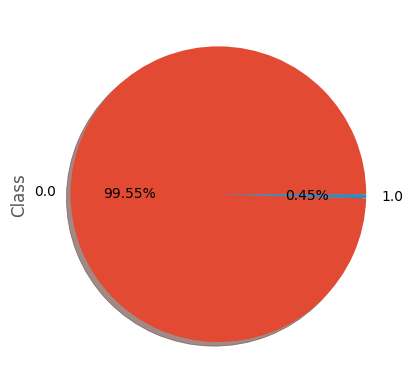

In [ ]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

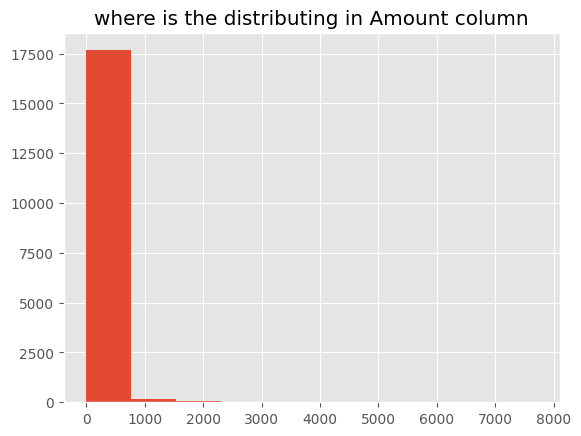

In [ ]:
plt.hist (data= df, x="Amount")
plt.title("where is the distributing in Amount column")
plt.show()

In [ ]:
df["Amount"].sort_values(ascending=False).head(10)

1632     7712.43
15835    6130.21
6783     4002.88
15714    4000.00
7617     3995.92
164      3828.04
2178     3669.00
2622     2909.97
17454    2763.25
7600     2746.34
Name: Amount, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

In [ ]:
X = df.drop(columns="Class")
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (13397, 30)
X Test  :  (4466, 30)
Y Train :  (13397,)
Y Test  :  (4466,)


In [ ]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC=SVC()

In [ ]:
# Check for missing values in X_train
print(X_train.isnull().sum())

# Check for missing values in y_train
print(y_train.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64
1


In [ ]:
# Impute missing values in X_train with the mean
X_train = X_train.fillna(X_train.mean())

# Drop missing values in y_train
y_train = y_train.dropna()

In [ ]:
X_test = X_test.dropna()
X_test = X_test.fillna(X_test.mean())

In [ ]:
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

y_train.shape: (13396,)
y_test.shape: (4466,)


In [ ]:
print("y_train.isnull().sum():", y_train.isnull().sum())
print("y_test.isnull().sum():", y_test.isnull().sum())

y_train.isnull().sum(): 0
y_test.isnull().sum(): 0


In [ ]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

Length of X_train: 13397
Length of y_train: 13396


In [ ]:
missing_values_X = X_train.isnull().sum().sum()
missing_values_y = y_train.isnull().sum()

print("Number of missing values in X_train:", missing_values_X)
print("Number of missing values in y_train:", missing_values_y)

Number of missing values in X_train: 0
Number of missing values in y_train: 0


In [ ]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

In [ ]:
print(X_train.head())

        Time        V1        V2        V3        V4        V5        V6  \
10616  17776 -1.450459  1.962882  1.460747  2.917672  0.301669  0.095915   
3173    2748 -1.555091  0.408805  2.819519  0.758859  0.899581  0.153879   
13124  23040  0.879295  0.001973 -0.094510  1.264449  0.544229  0.705941   
5251    5086  1.218937  0.390308 -0.095416  1.034363  0.391304 -0.218574   
12538  21940  1.302643 -0.465118  0.788434 -0.414847 -1.085432 -0.719777   

             V7        V8        V9  ...       V20       V21       V22  \
10616  1.130984 -0.442507 -0.193925  ... -0.187036 -0.081123  0.196692   
3173   0.141361  0.454719 -1.218959  ... -0.026393  0.193270  0.156128   
13124  0.168938  0.193764  1.159581  ... -0.232132  0.037570  0.273465   
5251   0.220289 -0.187916  0.914154  ... -0.083897 -0.162890 -0.264037   
12538 -0.720332 -0.131308  0.565153  ... -0.010001 -0.190552 -0.465660   

            V23       V24       V25       V26       V27       V28  Amount  
10616 -0.155843  0.373

In [ ]:
print(X_train.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [ ]:
X_train = X_train.dropna()
X_train = X_train.fillna(X_train.mean())


In [ ]:
for i in li:
  print(y_train.isnull().sum())

0
0
0
0
0
0


In [ ]:
  y_train = y_train.dropna()
  y_train = y_train.fillna(y_train.mode()[0])
  y_train = y_train.fillna("Unknown")

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (13397, 30)
y_train shape: (13396,)
X_test shape: (4466, 30)


In [ ]:
# If X_train and y_train have different number of rows, fix it
if X_train.shape[0] != y_train.shape[0]:
    # Drop the last row of X_train or y_train to make them consistent
    if X_train.shape[0] > y_train.shape[0]:
        X_train = X_train[:-1]
    else:
        y_train = y_train[:-1]

# If X_test has a different number of rows than X_train, fix it
if X_train.shape[0] != X_test.shape[0]:
    # Drop the last row of X_test to make it consistent with X_train
    X_test = X_test[:-1]

In [ ]:
i.fit(X_train,y_train)
ypred = i.predict(X_test)

In [ ]:
if len(y_test) > len(ypred):
    y_test = y_test[:-1]
elif len(ypred) > len(y_test):
    ypred = ypred[:-1]

In [ ]:
print(len(y_test))
print(len(ypred))

4465
4465


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(y_test)
print(ypred)

5960     0.0
8181     0.0
13460    0.0
11375    0.0
17024    0.0
        ... 
6584     0.0
7963     0.0
8991     0.0
10705    0.0
10605    0.0
Name: Class, Length: 4465, dtype: float64
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
nan_mask = np.isnan(y_test)
print(f"Number of NaN values in y_test: {nan_mask.sum()}")

nan_mask = np.isnan(ypred)
print(f"Number of NaN values in ypred: {nan_mask.sum()}")

Number of NaN values in y_test: 0
Number of NaN values in ypred: 0


In [ ]:
y_test = y_test[~nan_mask]
ypred = ypred[~nan_mask]

In [ ]:

nan_indices = np.isnan(y_test)
print("Indices with NaN values in y_test:", np.where(nan_indices)[0])


Indices with NaN values in y_test: []


In [ ]:
print(i,":",classification_report(y_test,ypred))

print("********************************************")

MLPClassifier() :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4441
         1.0       0.65      0.62      0.64        24

    accuracy                           1.00      4465
   macro avg       0.83      0.81      0.82      4465
weighted avg       1.00      1.00      1.00      4465

********************************************


In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression

In [ ]:
F_50 = SelectPercentile( percentile= 50)

In [ ]:
# Check for missing values
missing_values = X.isnull().sum().sum()

# Check the data type of X
data_type = X.dtypes

# Print the results
print(f"Missing values: {missing_values}")
print(f"Data type: {data_type}")

Missing values: 25
Data type: Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object


In [ ]:
nan_indices = pd.isnull(y)
print(y[nan_indices])

17917   NaN
Name: Class, dtype: float64


In [ ]:
X = X[~nan_indices]
y = y.dropna()


In [ ]:
y.fillna(value=0, inplace=True)



In [ ]:
mean_value = y.mean()
y.fillna(mean_value, inplace=True)

In [ ]:
set_X = F_50.fit_transform(X, y)


In [ ]:
selected_columns = [i for i, j in zip(X.columns, F_50.get_support()) if j == True]


In [ ]:
selected_columns = [i for i, j in zip(X.columns, F_50.get_support()) if j == True]
new_x = pd.DataFrame(set_X, columns=selected_columns)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (17862, 30)
y Shape: (17862,)


In [ ]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

Missing values in X: 0
Missing values in y: 0


In [ ]:
# Remove duplicate row in y
y = y.drop_duplicates()

# Verify data size consistency
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (17862, 30)
y Shape: (2,)


In [ ]:
X = new_x
y = df["Class"]

In [ ]:
X_train = train_test_split(X)


In [ ]:
X_test = train_test_split(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train, y_test = train_test_split(y_train, test_size=0.25)

In [ ]:

y_test = train_test_split(y, random_state=42)


In [ ]:
print(type(X_train))
print(type(X_test))

<class 'list'>
<class 'list'>


In [ ]:
X_train = pd.DataFrame([dict(row) for row in X_train])
X_test = pd.DataFrame([dict(row) for row in X_test])

In [ ]:
X_train = pd.DataFrame(X_train.values.tolist())
X_test = pd.DataFrame(X_test.values.tolist())
print(X_train.shape)
print(X_test.shape)

(2, 15)
(2, 17863)


In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (2, 15)
X Test  :  (2, 17863)
Y Train :  (10047,)
Y Test  :  (2, 17863)


In [ ]:
print(type(y_train))
y_train = y_train.to_numpy()

<class 'pandas.core.series.Series'>


In [ ]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

In [ ]:
print(f"y_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train first element: {y_train[0]}")

y_train type: <class 'numpy.ndarray'>
y_train shape: (10047,)
y_train first element: 0.0


In [ ]:
print(y_train.dtype)

float64


In [ ]:
y_train = y_train.astype('int')

In [ ]:
li = [LogisticRegression() for _ in range(3)]

In [ ]:
i = LogisticRegression()

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()

In [ ]:
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2, 15)
(10047,)


In [ ]:


# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Filter non-numeric values using isin() method
non_numeric_values = y_train_series[~y_train_series.isin([0, 1])]

# Print the number of non-numeric values
print(f"Number of non-numeric values: {len(non_numeric_values)}")

Number of non-numeric values: 0


In [ ]:
df['Class'].value_counts()

0.0    17781
1.0       81
Name: Class, dtype: int64

In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(17781, 31)
(81, 31)


In [ ]:
legit.Amount.describe()

count    17781.000000
mean        67.497142
std        189.016461
min          0.000000
25%          5.530000
50%         15.950000
75%         56.650000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,13909.355942,-0.201419,0.226100,0.840832,0.261216,-0.116804,0.110084,-0.109623,-0.007410,0.751028,...,0.033286,-0.056804,-0.144003,-0.037186,0.016526,0.118912,0.036588,0.011394,0.006738,67.497142
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,...,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0
17480,28755,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,...,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     81
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,13805.469512,-0.143020,0.262802,0.780726,0.189852,-0.189473,0.066024,-0.136813,-0.020494,0.805617,...,-0.018418,-0.053271,-0.163091,-0.044934,0.023763,0.123647,0.037070,0.000079,-0.004134,60.625976
1.0,16833.074074,-9.315066,6.779465,-13.052870,6.451318,-6.557541,-2.602613,-9.012856,4.730365,-3.087651,...,0.756424,0.549752,-0.423495,-0.398104,-0.277836,0.355688,0.177616,0.940693,0.090007,98.105926


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time         V1         V2         V3        V4         V5        V6  \
11432  19894  -0.612965   0.255362   1.895168 -0.562604  -0.718350 -0.411348   
13310  23464   1.101191   0.576720   0.536419  3.071235   0.000761  0.153122   
13285  23415  -0.289173   1.324253   0.843539  1.210945  -0.216125 -0.784702   
15104  26458  -0.331976   0.917888   1.552326  0.215447   0.603356  0.269325   
14486  25663  -0.528215   0.732912   1.420989  0.038580  -0.509332 -0.162091   
...      ...        ...        ...        ...       ...        ...       ...   
17317  28625 -27.848181  15.598193 -28.923756  6.418442 -20.346228 -4.828202   
17366  28658 -28.524268  15.876923 -29.468732  6.447591 -20.786000 -4.865613   
17407  28692 -29.200329  16.155701 -30.013712  6.476731 -21.225810 -4.902997   
17453  28726 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
17480  28755 -30.552380  16.713389 -31.103685  6.534984 -22.105532 -4.977692   

              V7         V8        V9  

In [ ]:
print(Y)

11432    0.0
13310    0.0
13285    0.0
15104    0.0
14486    0.0
        ... 
17317    1.0
17366    1.0
17407    1.0
17453    1.0
17480    1.0
Name: Class, Length: 573, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(573, 30) (458, 30) (115, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model evaluation: Accuracy score


In [ ]:
!pip install sklearn
from sklearn.metrics import accuracy_score

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9956331877729258


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9652173913043478
